In [1]:
import seaborn as sns
import os
import pandas as pd
import numpy as np
np.random.seed(1337)
from IPython.display import Image
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import read_csv
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns 

import sklearn
from sklearn.linear_model import ElasticNet
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
train = pd.read_csv('/Users/quent1/Desktop/Cranfield assignment/Statistical learning methods/code/train_selected.csv')
test = pd.read_csv('/Users/quent1/Desktop/Cranfield assignment/Statistical learning methods/code/test_selected.csv')
test_ttf = pd.read_csv('/Users/quent1/Desktop/Cranfield assignment/Statistical learning methods/code/test_selected_ttf.csv')
scaler = MinMaxScaler()

train =train.drop(['label_bnc'],axis=1)
train =train.drop(['id'],axis=1)
test =test.drop(['id'],axis=1)

ntrain = train.copy()
ntrain.iloc[:,0:5] = scaler.fit_transform(ntrain.iloc[:,0:5])
ntest = test.copy()
ntrain


,cycle,s1,s2,s3,s4,ttf
0,0.000000,0.309757,0.726248,0.369048,0.633262,191
1,0.002770,0.352633,0.628019,0.380952,0.765458,190
2,0.005540,0.370527,0.710145,0.250000,0.795309,189
3,0.008310,0.331195,0.740741,0.166667,0.889126,188
4,0.011080,0.404625,0.668277,0.255952,0.746269,187
...,...,...,...,...,...,...
20626,0.540166,0.782917,0.254428,0.726190,0.170576,4
20627,0.542936,0.866475,0.162641,0.708333,0.211087,3
20628,0.545706,0.775321,0.175523,0.738095,0.281450,2
20629,0.548476,0.747468,0.133655,0.916667,0.208955,1


In [10]:
pd.DataFrame(ntest.columns).T


,0,1,2,3,4,5
0,id,cycle,s1,s2,s3,s4


In [33]:
ntest.iloc[:,0:5] = scaler.transform(ntest.iloc[:,0:5])
ntest

,cycle,s1,s2,s3,s4
0,0.083102,0.281229,0.735910,0.226190,0.660981
1,0.132964,0.482444,0.590982,0.488095,0.650320
2,0.346260,0.618501,0.441224,0.613095,0.456290
3,0.290859,0.415766,0.449275,0.476190,0.680171
4,0.268698,0.626435,0.553945,0.363095,0.492537
...,...,...,...,...,...
95,0.265928,0.264855,0.666667,0.172619,0.769723
96,0.368421,0.483964,0.676329,0.315476,0.616205
97,0.332410,0.560770,0.578100,0.482143,0.605544
98,0.265928,0.265530,0.789050,0.244048,0.667377


In [48]:
ntrain

,cycle,s1,s2,s3,s4,ttf
0,0.000000,0.309757,0.726248,0.369048,0.633262,191
1,0.002770,0.352633,0.628019,0.380952,0.765458,190
2,0.005540,0.370527,0.710145,0.250000,0.795309,189
3,0.008310,0.331195,0.740741,0.166667,0.889126,188
4,0.011080,0.404625,0.668277,0.255952,0.746269,187
...,...,...,...,...,...,...
20626,0.540166,0.782917,0.254428,0.726190,0.170576,4
20627,0.542936,0.866475,0.162641,0.708333,0.211087,3
20628,0.545706,0.775321,0.175523,0.738095,0.281450,2
20629,0.548476,0.747468,0.133655,0.916667,0.208955,1


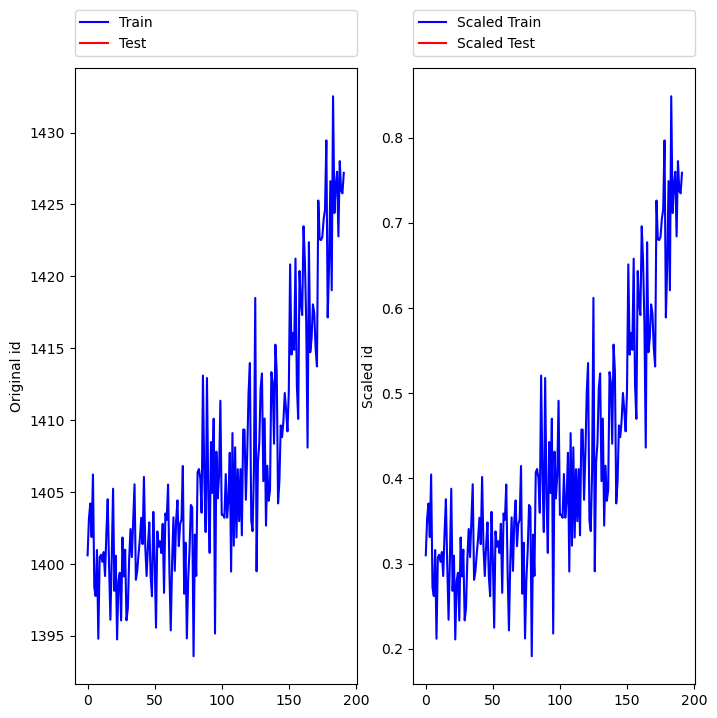

In [50]:
fig = plt.figure(figsize = (8, 8))
fig.add_subplot(1,2,1)
plt.plot(train[train.id==1].s1, color="blue")
plt.plot(test[test.id==1].s1, color="red")
plt.legend(['Train','Test'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Original id')
fig.add_subplot(1,2,2)
plt.plot(ntrain[ntrain.id==1].s1, color="blue")
plt.plot(ntest[ntest.id==1].s1, color="red")
plt.legend(['Scaled Train','Scaled Test'], bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0)
plt.ylabel('Scaled id')
plt.show()

In [49]:
X_train = ntrain.values[:,0:5]
Y_train = ntrain.values[:,5]
X_test = ntest.values[:,0:5]


In [50]:
X_test.shape

(100, 5)

In [51]:
regressor = GradientBoostingRegressor()
regressor.fit(X_train, Y_train)

GradientBoostingRegressor()

In [52]:
score = regressor.predict(X_test)


In [53]:
print(score.min(), score.max())


4.817289069675152 184.47850810439016


In [41]:
test_ttf = test_ttf['ttf']

In [14]:
df1 = pd.concat([test_ttf, pd.Series(score)], axis=1)
df1.columns = ['true', 'predicted']

In [54]:
df1['diff'] = df1['predicted']-df1['true']
df1.head()

,true,predicted,diff
0,112,184.478508,72.478508
1,98,145.817776,47.817776
2,69,35.297441,-33.702559
3,82,87.952669,5.952669
4,91,85.800389,-5.199611


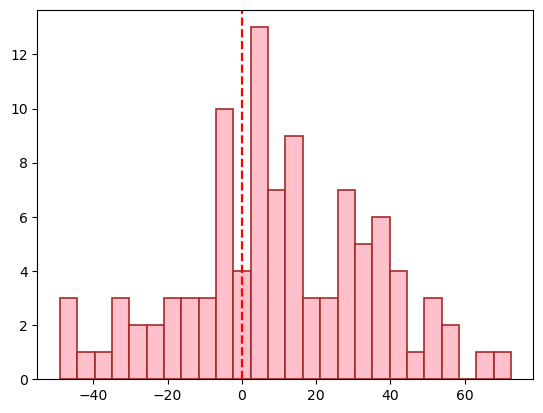

In [16]:
plt.hist(df1['diff'], bins=26, color="pink", edgecolor='brown', linewidth=1.2)
plt.axvline(0, color="red", linestyle='dashed', linewidth=1.6)
plt.show()

In [55]:
pd.DataFrame({'Count': [(df1['diff']<0).sum(), (df1['diff']==0).sum(),
 (df1['diff']>0).sum()]}, columns=['Count'],
 index=['Smaller', 'Zero', 'Larger'])

,Count
Smaller,32
Zero,0
Larger,68


In [56]:
from sklearn import metrics
print("Gradient Boosting R-squared", "{:.2%}".format(metrics.r2_score(test_ttf, score)))

Gradient Boosting R-squared 55.93%


In [57]:
print("The Root Mean Squared Error (RMSE) is:",
 round(np.sqrt(metrics.mean_squared_error(test_ttf, score)),2))

The Root Mean Squared Error (RMSE) is: 27.59


In [45]:
print("The Mean Absolute Error (MAE) is:",
 round(metrics.mean_absolute_error(test_ttf, score),2))

The Mean Absolute Error (MAE) is: 21.88


In [47]:
feature_labels = np.array([ 'cycle', 's1', 's2','s3','s4'])
importance = regressor.feature_importances_
feature_indexes_by_importance = importance.argsort()[::-1]
for index in feature_indexes_by_importance:
 print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

cycle-74.07%
s3-11.42%
s1-7.28%
s4-4.17%
s2-3.05%


CROSS VALIDATION


In [90]:
def build_model(_alpha, _l1_ratio):
    estimator = ElasticNet(
        alpha=_alpha,
        l1_ratio=_l1_ratio,
        fit_intercept=True,
        normalize=False,
        precompute=False,
        max_iter=16,
        copy_X=True,
        tol=0.1,
        warm_start=False,
        positive=False,
        random_state=None,
        selection='random'
    )

    return MultiOutputRegressor(estimator, n_jobs=4)

In [29]:
    parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [30]:
model = GradientBoostingRegressor()


In [31]:
    grid_GBR = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
    grid_GBR.fit(X_train, Y_train)

    print(" Results from Grid Search " )
    print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
    print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
    print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=4, subsample=0.2)

 The best score across ALL searched params:
 0.6459662382549869

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.2}


In [103]:
model = GradientBoostingRegressor(learning_rate=0.03, max_depth=4, subsample=0.5,n_estimators= 100)
rmse = np.sqrt(-cross_val_score(model, X_train, Y_train, scoring='root_mean_squared_error'))
R2 = cross_val_score(model, X_train, Y_train, scoring='r2')

print(f"RMSE: {rmse.mean()} (+/- {rmse.std()}")
print(f"\nR2: {R2.mean()} (+/- {R2.std()}")

RMSE: 35.610068781324586 (+/- 15.61266515082837

R2: 0.7042210733407716 (+/- 0.16756053317267938


In [101]:
model = GradientBoostingRegressor(learning_rate=0.03, max_depth=4, subsample=0.5,n_estimators= 100)
model.fit(X_train,Y_train)

GradientBoostingRegressor(learning_rate=0.03, max_depth=4, subsample=0.5)

In [102]:
score=model.predict(X_test)
print("Gradient Boosting R-squared", "{:.2%}".format(metrics.r2_score(test_ttf, score)))

Gradient Boosting R-squared 56.72%
